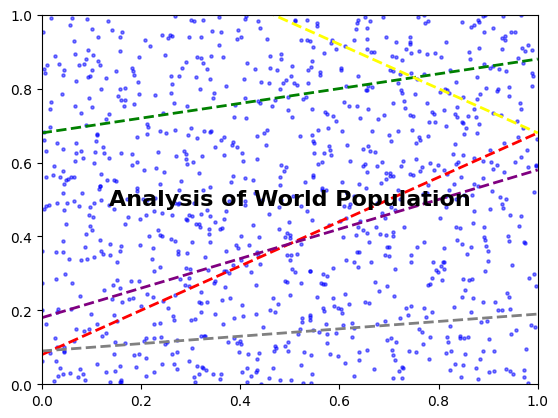

This project uses data from the CIA World Factbook, which is a collection of statistics for all countries on Earth. Demographic data for the project comes from 2023

The original dataset from the CIA World Factbook consisted of 261 rows, but I chose not to include data for dependent territories such as: Virgin Islands, Niue, Jan Mayen, etc.  The final data set consists of 12 columns and 195 rows.

Tech Stack: Python, R, Excel, SQL.

In [9]:
import cx_Oracle
import pandas as pd

connection = cx_Oracle.connect("Population", "123", "localhost:1521/XEPDB1")

# Here we imported the libraries and connected to the database in jupyter nootebook

<cx_Oracle.Connection to Population@localhost:1521/XEPDB1>

In [10]:
cursor = connection.cursor()
cursor.execute(
    "SELECT "
    "    cols.column_name, "
    "    cols.data_type, "
    "    cols.data_length, "
    "    cols.nullable, "
    "    cons.constraint_name, "
    "    cons.constraint_type "
    "FROM all_tab_columns cols "
    "LEFT JOIN all_cons_columns col_cons ON cols.owner = col_cons.owner "
    "    AND cols.table_name = col_cons.table_name "
    "    AND cols.column_name = col_cons.column_name "
    "LEFT JOIN all_constraints cons ON col_cons.owner = cons.owner "
    "    AND col_cons.constraint_name = cons.constraint_name "
    "WHERE cols.table_name = 'COUNTRIES_DATA' "
    "    AND cols.owner = 'POPULATION' "
    "ORDER BY cols.column_id"
)
result = cursor.fetchall()
columns = [
    'COLUMN_NAME',
    'DATA_TYPE',
    'DATA_LENGTH',
    'NULLABLE',
    'CONSTRAINT_NAME',
    'CONSTRAINT_TYPE'
]
df = pd.DataFrame(result, columns=columns)

df


,COLUMN_NAME,DATA_TYPE,DATA_LENGTH,NULLABLE,CONSTRAINT_NAME,CONSTRAINT_TYPE
0,ID,NUMBER,22,N,SYS_C007791,P
1,DATA_CODE,VARCHAR2,3,N,SYS_C007788,C
2,COUNTRY,VARCHAR2,50,Y,None,None
3,CONTINENT,VARCHAR2,15,N,SYS_C007789,C
4,AREA,NUMBER,22,Y,None,None
5,AREA_LAND,NUMBER,22,Y,None,None
6,AREA_WATER,NUMBER,22,Y,None,None
7,POPULATION,NUMBER,22,N,SYS_C007790,C
8,POPULATION_GROWTH_RATE,FLOAT,22,Y,None,None
9,BIRTH_RATE,FLOAT,22,Y,None,None


**Datasets:**
<br> ID - identification number assigned to the country.
<br>data_codes - ISO country code, consisting of three letters.
<br>country - country name
<br>continent - the continent on which the country is located
<br>area - total area of the country (area_land + area_water).
<br>area_land - country land surface
<br>area_water - country water surface
<br>population - total population of the country
<br>population_increase - population growth rate in 2023 in %
<br>birth_rate - births/1,000 population
<br>death_rate - death/1,000 population
<br>net_migration_rate - the ratio of people who left the country for another country.


In [6]:
cursor = connection.cursor()
cursor.execute("SELECT * FROM Countries_data")
result = cursor.fetchall()
df = pd.DataFrame(result, columns=[desc[0] for desc in cursor.description])
df.to_string(index=False)

df

,ID,DATA_CODE,COUNTRY,CONTINENT,AREA,AREA_LAND,AREA_WATER,POPULATION,POPULATION_GROWTH_RATE,BIRTH_RATE,DEATH_RATE,NET_MIGRATION_RATE
0,1,AFG,Afghanistan,Asia,65223,65223,0.0,39232003,2.26,34.79,12.08,-0.10
1,2,ALB,Albania,Europe,28748,27398,1350.0,3101621,0.19,12.48,7.36,-3.22
2,3,DZA,Algeria,Africa,2381740,2381740,0.0,44758398,1.27,17.84,4.33,-0.81
3,4,ASM,American Samoa,Oceania,224,224,0.0,44620,-1.74,16.18,6.19,-27.36
4,5,AND,Andorra,Europe,468,468,0.0,85468,-0.11,6.87,7.98,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
189,190,VEN,Venezuela,South America,912050,882050,30000.0,30518260,2.40,16.99,6.55,13.55
190,191,VNM,Vietnam,Asia,331210,310070,21140.0,104799174,0.93,15.29,5.77,-0.21
191,192,YEM,Yemen,Asia,527968,527968,0.0,31565602,1.83,24.05,5.54,-0.19
192,193,ZMB,Zambia,Africa,752618,743398,9220.0,20216029,2.86,34.48,6.02,0.16


In [7]:
cursor = connection.cursor()
cursor.execute(
"""
    SELECT CONTINENT, COUNT(COUNTRY) AS Number_of_Countries
    FROM countries_data
    GROUP BY CONTINENT
"""
)
result = cursor.fetchall()
columns = ["CONTINENT", "Number_of_Countries"]
df = pd.DataFrame(result, columns=columns)

df

,CONTINENT,Number_of_Countries
0,Asia,46
1,Europe,44
2,Oceania,16
3,Africa,53
4,South America,12
5,North America,23


In [ ]:
library(ggplot2)

data <- data.frame(
  CONTINENT = c('Asia', 'Europe', 'Oceania', 'Africa', 'South America', 'North America'),
  Number_of_Countries = c(46, 44, 16, 53, 12, 23)
)

ggplot(data, aes(x = Number_of_Countries, y = CONTINENT, fill = CONTINENT)) +
  geom_bar(stat = "identity", color = "black", width = 0.7) +  
  geom_text(aes(label = Number_of_Countries), hjust = -0.2, size = 4) +  
  labs(x = "Number of Countries", y = "Continent") +
  ggtitle("Number of countries on continents") +
  theme_minimal() +
  theme(legend.position = "none")  

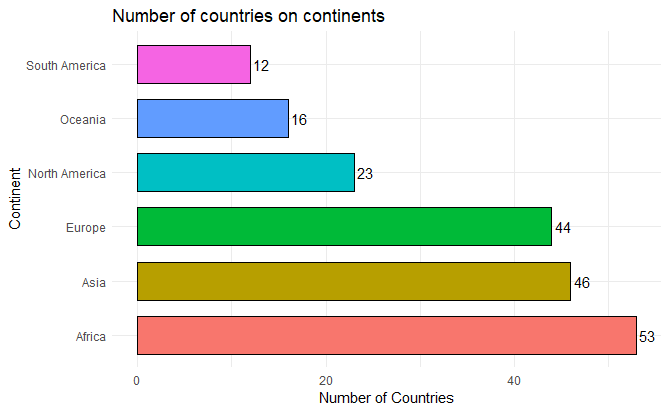

In [95]:
cursor = connection.cursor()
cursor.execute(
    "SELECT "
    "    (SELECT country FROM countries_data WHERE population = (SELECT MIN(population) FROM countries_data WHERE country <> 'American Samoa')) AS country_min_pop, "
    "    (SELECT country FROM countries_data WHERE population = (SELECT MAX(population) FROM countries_data WHERE country <> 'American Samoa')) AS country_max_pop, "
    "    (SELECT country FROM countries_data WHERE population_growth_rate = (SELECT MIN(population_growth_rate) FROM countries_data WHERE country <> 'American Samoa')) AS country_min_pop_growth, "
    "    (SELECT country FROM countries_data WHERE population_growth_rate = (SELECT MAX(population_growth_rate) FROM countries_data WHERE country <> 'American Samoa')) AS country_max_pop_growth, "
    "    (SELECT MIN(population) FROM countries_data WHERE country <> 'American Samoa') AS min_pop, "
    "    (SELECT MAX(population) FROM countries_data WHERE country <> 'American Samoa') AS max_pop, "
    "    (SELECT MIN(population_growth_rate) FROM countries_data WHERE country <> 'American Samoa') AS min_pop_growth, "
    "    (SELECT MAX(population_growth_rate) FROM countries_data WHERE country <> 'American Samoa') AS max_pop_growth "
    "FROM dual"
)
result = cursor.fetchall()
columns = [desc[0] for desc in cursor.description]
df = pd.DataFrame(result, columns=columns)
df


,COUNTRY_MIN_POP,COUNTRY_MAX_POP,COUNTRY_MIN_POP_GROWTH,COUNTRY_MAX_POP_GROWTH,MIN_POP,MAX_POP,MIN_POP_GROWTH,MAX_POP_GROWTH
0,Holy See (Vatican City),China,Moldova,Syria,1000,1413142846,-1.14,6.39


In [43]:
cursor1 = connection.cursor()
cursor1.execute("""
SELECT *
FROM countries_data
WHERE population = (SELECT MIN(population)
                    FROM countries_data)
"""
)
columns1 = [desc[0] for desc in cursor1.description]
data1 = cursor1.fetchall()
df1 = pd.DataFrame(data1, columns=columns1)



,TOTAL_POPULATION
0,7877376948


In [94]:
cursor2 = connection.cursor()
cursor2.execute("""
    SELECT *
    FROM countries_data
    WHERE population = (SELECT MAX(population)
                        FROM countries_data
                        WHERE country <> 'American Samoa')
""")
columns2 = [desc[0] for desc in cursor2.description]
data2 = cursor2.fetchall()

df2 = pd.DataFrame(data2, columns=columns2)
df2

,ID,DATA_CODE,COUNTRY,CONTINENT,AREA,AREA_LAND,AREA_WATER,POPULATION,POPULATION_GROWTH_RATE,BIRTH_RATE,DEATH_RATE,NET_MIGRATION_RATE
0,37,CHN,China,Asia,9596960,9326410,270550,1413142846,0.18,9.69,7.82,-0.11


In [50]:
cursor3 = connection.cursor()
cursor3.execute("""
SELECT SUM(population) AS total_population
FROM countries_data
""")
columns3 = [desc[0] for desc in cursor3.description]
data3 = cursor3.fetchall()
df3 = pd.DataFrame(data3, columns=columns3)

df3

,TOTAL_POPULATION
0,7877376948


In [73]:
cursor = connection.cursor()
cursor.execute("""
    SELECT a.population AS population_best, 
           a.country AS The_best,
           b.population AS population_worst,
           b.country AS Worst
    FROM (
        SELECT population, country, ROWNUM AS rownum_best
        FROM (
            SELECT population, country
            FROM countries_data
            WHERE country <> 'American Samoa' 
            ORDER BY population DESC
        )
        WHERE ROWNUM <= 10
    ) a
    JOIN (
        SELECT population, country, ROWNUM AS rownum_worst
        FROM (
            SELECT population, country
            FROM countries_data
            WHERE country <> 'American Samoa' 
            ORDER BY population ASC
        )
        WHERE ROWNUM <= 10
    ) b
    ON a.rownum_best = b.rownum_worst
""")
result = cursor.fetchall()
columns = ["population_best", "The_best", "population_worst", "Worst"]
df = pd.DataFrame(result, columns=columns)

df

,population_best,The_best,population_worst,Worst
0,1413142846,China,1000,Holy See (Vatican City)
1,1399179585,India,9852,Nauru
2,339665118,United States,11639,Tuvalu
3,279476346,Indonesia,21779,Palau
4,247653551,Pakistan,31597,Monaco
5,230842743,Nigeria,34892,San Marino
6,218689757,Brazil,39993,Liechtenstein
7,167184465,Bangladesh,54817,Saint Kitts and Nevis
8,141698923,Russia,74656,Dominica
9,129875529,Mexico,80966,Marshall Islands


In [ ]:
library(ggplot2)

data <- data.frame(
  Population = c(1413142846, 1399179585, 339665118, 279476346, 247653551, 230842743, 218689757, 167184465, 141698923, 129875529),
  Country = c("China", "India", "United States", "Indonesia", "Pakistan", "Nigeria", "Brazil", "Bangladesh", "Russia", "Mexico")
)
ggplot(data, aes(x = reorder(Country, -Population), y = Population, fill = Country)) +
  geom_bar(stat = "identity") +
  geom_text(aes(label = Population), vjust = -0.5, size = 2) + 
  labs(x = "Kraj", y = "Population", fill = "Country") +
  ggtitle("Top 10 Population") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

In [ ]:
library(ggplot2)

data <- data.frame(
  Population = c(1000, 9852, 11639, 21779, 31597, 34892, 39993, 54817, 74656, 80966),
  Country = c("Holy See (Vatican City)", "India", "Nauru", "Tuvalu", "Palau", "Monaco", "San Marino", "Liechtenstein", "Saint Kitts and Nevis", "Dominica")
)
result <- ggplot(data, aes(x = reorder(Country, Population), y = Population)) +
  geom_bar(stat = "identity", fill = "purple", color = "black") +
  geom_text(aes(label = Population), vjust = -0.3, size = 3) +
  labs(x = "Country", y = "Population", fill = "Country") +
  ggtitle("Top 10 worst population") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

print(result)


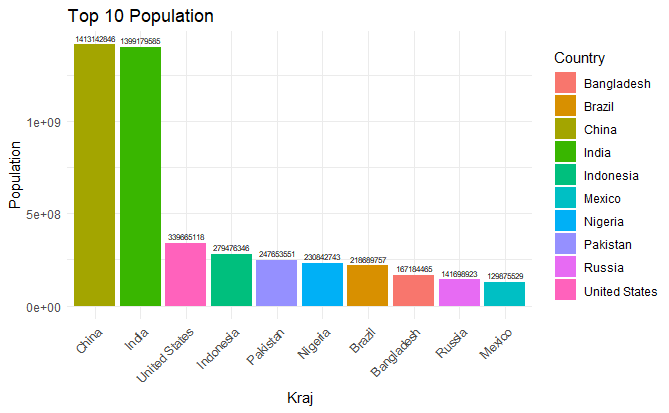
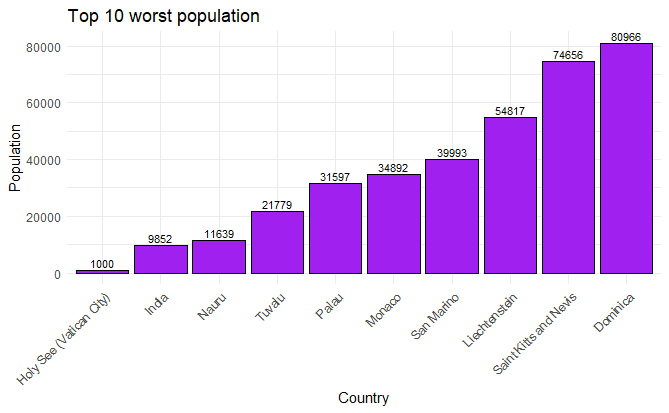

In [71]:
cursor = connection.cursor()
cursor.execute("""
    SELECT a.area AS area_best, 
           a.country AS The_best,
           b.area AS area_worst,
           b.country AS Worst
    FROM (
        SELECT area, country, ROWNUM AS rownum_best
        FROM (
            SELECT area, country
            FROM countries_data
            WHERE country <> 'American Samoa' 
            ORDER BY area DESC
        )
        WHERE ROWNUM <= 10
    ) a
    JOIN (
        SELECT area, country, ROWNUM AS rownum_worst
        FROM (
            SELECT area, country
            FROM countries_data
            WHERE country <> 'American Samoa' 
            ORDER BY area ASC
        )
        WHERE ROWNUM <= 10
    ) b
    ON a.rownum_best = b.rownum_worst
""")
result = cursor.fetchall()
columns = ["area_best", "The_best", "area_worst", "Worst"]
df = pd.DataFrame(result, columns=columns)

df

# the result visible for Vatican shows the number 0 because the result was rounded. The actual area of the Vatican is 0.49 km²


,area_best,The_best,area_worst,Worst
0,17098242,Russia,0,Holy See (Vatican City)
1,9984670,Canada,2,Monaco
2,9833517,United States,21,Nauru
3,9596960,China,26,Tuvalu
4,8515770,Brazil,61,San Marino
5,7741220,Australia,160,Liechtenstein
6,3287263,India,181,Marshall Islands
7,2780400,Argentina,261,Saint Kitts and Nevis
8,2724900,Kazakhstan,298,Maldives
9,2381740,Algeria,316,Malta


In [ ]:
library(ggplot2)

data <- data.frame(
  Area = c(17098242, 9984670, 9833517, 9596960, 8515770, 7741220, 3287263, 2780400, 2724900, 2381740),
  Country = c("Russia", "Canada", "United States", "China", "Brazil", "Australia", "India", "Argentina", "Kazakhstan", "Algeria")
)

data <- data[order(-data$Area), ]
data <- data[data$Area > 0, ]
chart <- ggplot(data, aes(x = reorder(Country, -Area), y = Area)) +
  geom_bar(stat = "identity", fill = "purple", color = "black") +
  geom_text(aes(label = Area), vjust = -0.3, size = 3) +
  labs(x = "Country", y = "Area", fill = "Country") +
  ggtitle("Country Area") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

print(chart)


In [ ]:
library(ggplot2)


data <- data.frame(
  Area = c(0.49, 2, 21, 26, 61, 160, 181, 261, 316),
  Country = c("Holy See (Vatican City)", "Monaco", "Nauru", "Tuvalu", "San Marino", "Liechtenstein", "Marshall Islands", "Saint Kitts and Nevis", "Malta")
)

chart <- ggplot(data, aes(x = reorder(Country, Area), y = Area)) +
  geom_bar(stat = "identity", fill = "purple", color = "black") +
  geom_text(aes(label = Area ), vjust = -0.3, size = 3) +
  labs(x = "Country", y = "Area", fill = "Country") +
  ggtitle("Country Area)") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


print(chart)

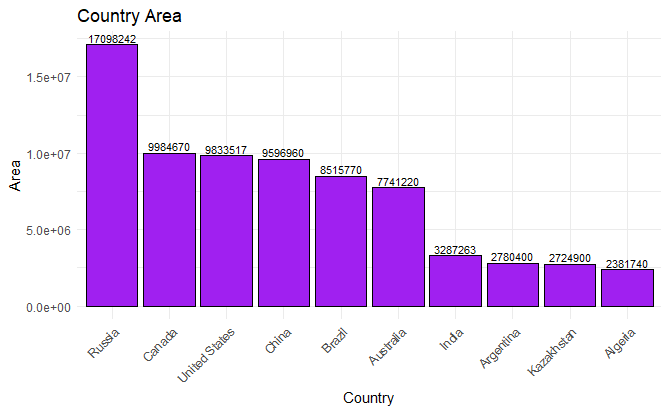
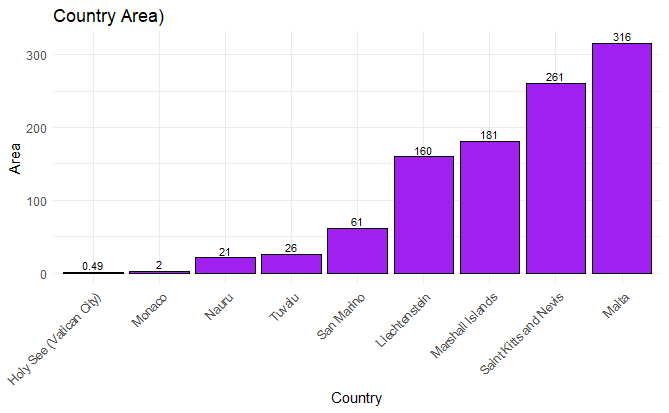

In [72]:
cursor = connection.cursor()
cursor.execute("""
    SELECT a.population_growth_rate AS population_growth_rate_best, 
           a.country AS The_best,
           b.population_growth_rate AS population_growth_rate_worst,
           b.country AS Worst
    FROM (
        SELECT population_growth_rate, country, ROWNUM AS rownum_best
        FROM (
            SELECT population_growth_rate, country
            FROM countries_data
            WHERE country <> 'American Samoa'
            ORDER BY population_growth_rate DESC
        )
        WHERE ROWNUM <= 10
    ) a
    JOIN (
        SELECT population_growth_rate, country, ROWNUM AS rownum_worst
        FROM (
            SELECT population_growth_rate, country
            FROM countries_data
            WHERE country <> 'American Samoa' 
            ORDER BY population_growth_rate ASC
        )
        WHERE ROWNUM <= 10
    ) b
    ON a.rownum_best = b.rownum_worst
""")
result = cursor.fetchall()
columns = ["population_growth_rate_best", "The_best", "population_growth_rate_worst", "Worst"]
df = pd.DataFrame(result, columns=columns)

df

# an error has crept into the database and one row contains American Samoa, which is a dependent territory, 
# i.e. a non-incorporated territory of the United States. 
# The assumption of the analysis is to study countries that are member states of the United Nations,
# while American Samoa is not on this list

,population_growth_rate_best,The_best,population_growth_rate_worst,Worst
0,6.39,Syria,-1.14,Moldova
1,4.78,South Sudan,-1.13,Latvia
2,3.66,Niger,-1.04,Lithuania
3,3.59,Burundi,-1.01,Romania
4,3.36,Equatorial Guinea,-0.74,Estonia
5,3.34,Angola,-0.70,"Micronesia, Federated States of"
6,3.31,Benin,-0.66,Bulgaria
7,3.22,Uganda,-0.63,Serbia
8,3.13,"Congo, Democratic Republic of the",-0.52,Ukraine
9,3.05,Chad,-0.47,Croatia


In [ ]:
library(ggplot2)

data <- data.frame(
  GrowthRate = c(6.39, 4.78, 3.66, 3.59, 3.36, 3.34, 3.31, 3.22, 3.13, 3.05),
  Country = c("Syria", "South Sudan", "Niger", "Burundi", "Equatorial Guinea", "Angola", "Benin", "Uganda", "Congo, Democratic Republic", "Chad")
)

chart <- ggplot(data, aes(x = reorder(Country, GrowthRate), y = GrowthRate)) +
  geom_bar(stat = "identity", fill = "purple", color = "black") +
  geom_text(aes(label = sprintf("%.2f", GrowthRate)), vjust = -0.3, size = 3) +
  labs(x = "Country", y = "Growth_rate", fill = "Country") +
  ggtitle("Top 10 population growth rate") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

print(chart)

In [ ]:
library(ggplot2)

data <- data.frame(
  GrowthRate = c(-1.14, -1.13, -1.04, -1.01, -0.74, -0.70, -0.66, -0.63, -0.52, -0.47),
  Country = c("Moldova", "Latvia", "Lithuania", "Romania", "Estonia", "Micronesia, Federated States of", "Bulgaria", "Serbia", "Ukraine", "Croatia")
)

chart <- ggplot(data, aes(x = reorder(Country, GrowthRate), y = GrowthRate)) +
  geom_bar(stat = "identity", fill = "purple", color = "black") +
  geom_text(aes(label = sprintf("%.2f", GrowthRate)), vjust = 0.3, size = 3) +
  labs(x = "Country", y = "Growth_rate", fill = "Kraj") +
  ggtitle("Top 10 worst population growth rate") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

print(chart)

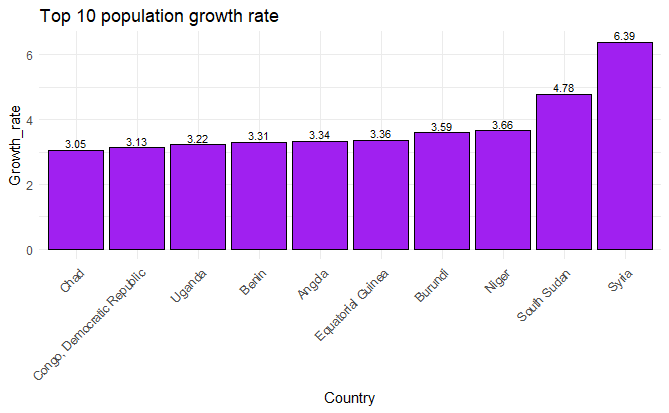
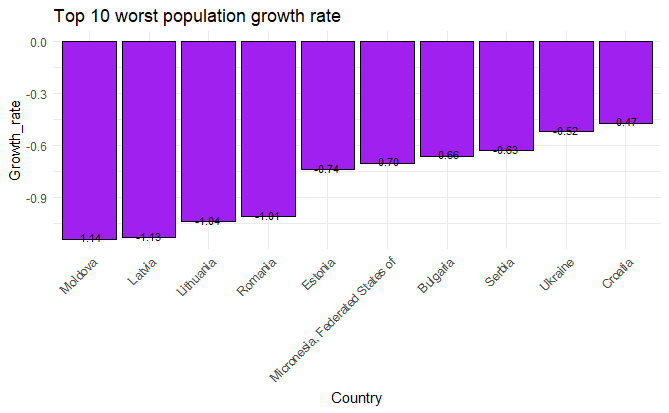

In [78]:
cursor = connection.cursor()
cursor.execute("""
    SELECT a.birth_rate AS birth_rate_best, 
           a.country AS The_best,
           b.birth_rate AS birth_rate_worst,
           b.country AS Worst
    FROM (
        SELECT birth_rate, country, ROWNUM AS rownum_best
        FROM (
            SELECT birth_rate, country
            FROM countries_data
            WHERE country <> 'Holy See (Vatican City)'
            ORDER BY birth_rate DESC
        )
        WHERE ROWNUM <= 10
    ) a
    JOIN (
        SELECT birth_rate, country, ROWNUM AS rownum_worst
        FROM (
            SELECT birth_rate, country
            FROM countries_data
            WHERE country <> 'American Samoa'
            ORDER BY birth_rate ASC
        )
        WHERE ROWNUM <= 10
    ) b
    ON a.rownum_best = b.rownum_worst
""")
result = cursor.fetchall()
columns = ["birth_rate_best", "The_best", "birth_rate_worst", "Worst"]
df = pd.DataFrame(result, columns=columns)

df

# Holy see (Vatican City) was not taken into account as there is no data on the number of births for this country

,birth_rate_best,The_best,birth_rate_worst,Worst
0,46.86,Niger,6.61,Monaco
1,41.42,Angola,6.87,Andorra
2,40.72,Benin,6.90,Japan
3,40.54,Mali,6.95,"Korea, South"
4,40.27,Uganda,7.00,Italy
5,39.85,Chad,7.12,Spain
6,39.64,"Congo, Democratic Republic of the",7.52,Greece
7,37.71,Somalia,7.97,Bulgaria
8,37.07,South Sudan,7.99,Portugal
9,36.94,Mozambique,8.12,Slovenia


In [ ]:
library(ggplot2)

data <- data.frame(
  Country = c("Niger", "Angola", "Benin", "Mali", "Uganda", "Chad", "Congo DR", "Somalia", "South Sudan", "Mozambique"),
  BirthRate = c(46.86, 41.42, 40.72, 40.54, 40.27, 39.85, 39.64, 37.71, 37.07, 36.94)
)

chart <- ggplot(data, aes(x = reorder(Country, -BirthRate), y = BirthRate)) +
  geom_bar(stat = "identity", fill = "purple", color = "black", size = 1) +
  geom_text(aes(label = sprintf("%.2f", BirthRate)), vjust = -0.5, size = 3, fontface = "bold") +
  labs(x = "Country", y = "Birth_rate") +
  ggtitle("TOP 10 population birth rate") +
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1, size = 10, face = "bold"),
    axis.text.y = element_text(size = 10),
    axis.title = element_text(size = 12, face = "bold"),
    plot.title = element_text(size = 14, face = "bold")
  )

print(chart)

In [ ]:
library(ggplot2)

data <- data.frame(
  Country = c("Monaco", "Andorra", "Japan", "Korea South", "Italy", "Spain", "Greece", "Bulgaria", "Portugal", "Slovenia"),
  BirthRate = c(6.61, 6.87, 6.90, 6.95, 7.00, 7.12, 7.52, 7.97, 7.99, 8.12)
)

chart <- ggplot(data, aes(x = reorder(Country, -BirthRate), y = BirthRate)) +
  geom_bar(stat = "identity", fill = "purple", color = "black", size = 1) +
  geom_text(aes(label = sprintf("%.2f", BirthRate)), vjust = -0.5, size = 3, fontface = "bold") +
  labs(x = "Country", y = "Birth Rate") +
  ggtitle("Top 10 worst birth rate") +
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1, size = 10, face = "bold"),
    axis.text.y = element_text(size = 10),
    axis.title = element_text(size = 12, face = "bold"),
    plot.title = element_text(size = 14, face = "bold")
  )

print(chart)

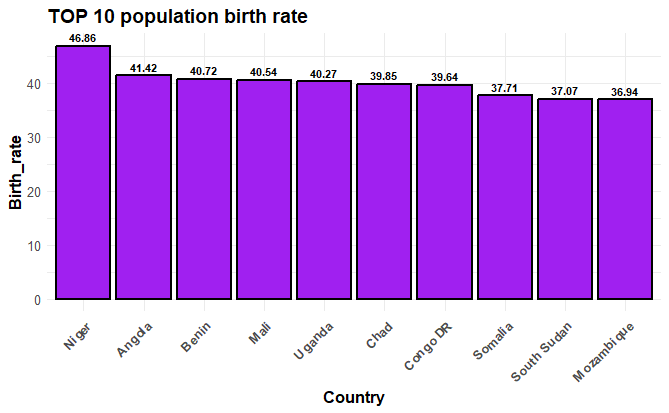
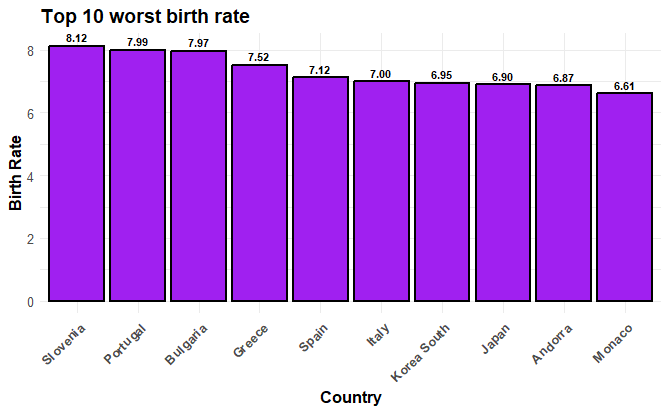

In [109]:
cursor = connection.cursor()
cursor.execute("""
    SELECT a.death_rate AS death_rate, 
           a.country AS The_best,
           a.continent AS continent,
           b.death_rate AS death_rate,
           b.country AS Worst,
           b.continent AS continent
    FROM (
        SELECT death_rate, country, continent, ROWNUM AS rownum_best
        FROM (
            SELECT death_rate, country, continent
            FROM countries_data
            WHERE country <> 'Holy See (Vatican City)'
            ORDER BY death_rate DESC
        )
        WHERE ROWNUM <= 10
    ) a
    JOIN (
        SELECT death_rate, country, continent, ROWNUM AS rownum_worst
        FROM (
            SELECT death_rate, country, continent
            FROM countries_data
            WHERE country <> 'American Samoa'
            ORDER BY death_rate 
        )
        WHERE ROWNUM <= 10
    ) b
    ON a.rownum_best = b.rownum_worst
""")
result = cursor.fetchall()
columns = ["death_rate", "High", "Continent", "death_rate", "Low", "Continent"]
df = pd.DataFrame(result, columns=columns)

df

,death_rate,High,Continent,death_rate,Low,Continent
0,15.17,Lithuania,Europe,1.42,Qatar,Asia
1,15.12,Serbia,Europe,1.62,United Arab Emirates,Asia
2,14.92,Romania,Europe,2.27,Kuwait,Asia
3,14.69,Latvia,Europe,2.83,Bahrain,Asia
4,14.31,Bulgaria,Europe,3.21,Oman,Asia
5,13.70,Ukraine,Europe,3.45,Libya,Africa
6,13.27,Russia,Asia,3.45,Saudi Arabia,Asia
7,13.13,Estonia,Europe,3.47,Jordan,Asia
8,12.98,Croatia,Europe,3.85,Brunei,Asia
9,12.89,Hungary,Europe,3.88,Iraq,Asia


In [114]:
cursor = connection.cursor()
cursor.execute("""
    SELECT a.net_migration_rate AS net_migration_rate_best, 
           a.country AS The_best,
           a.continent AS continent,
           b.net_migration_rate AS net_migration_rate_worst,
           b.country AS Worst,
           b.continent AS continent
    FROM (
        SELECT net_migration_rate, country, continent, ROWNUM AS rownum_best
        FROM (
            SELECT net_migration_rate, country, continent
            FROM countries_data
            WHERE country <> 'American Samoa' AND country <> 'Holy See (Vatican City)'
            ORDER BY net_migration_rate DESC
        )
        WHERE ROWNUM <= 10
    ) a
    JOIN (
        SELECT net_migration_rate, country, continent, ROWNUM AS rownum_worst
        FROM (
            SELECT net_migration_rate, country, continent
            FROM countries_data
            WHERE country <> 'American Samoa' AND country <> 'Holy See (Vatican City)'
            ORDER BY net_migration_rate ASC
        )
        WHERE ROWNUM <= 10
    ) b
    ON a.rownum_best = b.rownum_worst
""")
result = cursor.fetchall()
columns = ["net_migration_rate_best", "The_best", "Continent", "net_migration_rate_worst", "Worst", "Continent"]

df = pd.DataFrame(result, columns=columns)

df

,net_migration_rate_best,The_best,Continent,net_migration_rate_worst,Worst,Continent
0,45.78,Syria,Asia,-20.92,"Micronesia, Federated States of",Oceania
1,19.98,South Sudan,Africa,-18.06,Tonga,Oceania
2,13.55,Venezuela,South America,-12.80,Maldives,Asia
3,13.01,Equatorial Guinea,Africa,-10.99,Jordan,Asia
4,11.39,Luxembourg,Europe,-10.94,Guam,Oceania
5,10.89,Monaco,Europe,-10.15,Nauru,Oceania
6,6.84,Burundi,Africa,-9.38,Eritrea,Africa
7,6.65,Cyprus,Europe,-8.80,Moldova,Europe
8,6.39,Australia,Oceania,-7.42,Jamaica,North America
9,6.07,Saudi Arabia,Asia,-7.19,Samoa,Oceania


In [118]:
cursor = connection.cursor()
cursor.execute("""
SELECT ROUND(AVG(population), 1) AS avg_population, ROUND(AVG(area), 1) AS avg_area
  FROM countries_data
""")

columns = [desc[0] for desc in cursor.description]
data = cursor.fetchall()
df = pd.DataFrame(data, columns=columns)

df

,AVG_POPULATION,AVG_AREA
0,40605035.8,678854.3


In [120]:
cursor = connection.cursor()
cursor.execute("""
    SELECT country,continent, population, area
    FROM countries_data
    WHERE population > (SELECT AVG(population) FROM countries_data)
      AND area < (SELECT AVG(area) FROM countries_data)
    ORDER BY population DESC
""")
result = cursor.fetchall()
columns = [desc[0] for desc in cursor.description]
df = pd.DataFrame(result, columns=columns)

df

,COUNTRY,CONTINENT,POPULATION,AREA
0,Bangladesh,Asia,167184465,148460
1,Japan,Asia,123719238,377915
2,Philippines,Asia,116434200,300000
3,Vietnam,Asia,104799174,331210
4,Germany,Europe,84220184,357022
5,Thailand,Asia,69794997,513120
6,France,Europe,68521974,643801
7,United Kingdom,Europe,68138484,243610
8,Italy,Europe,61021855,301340
9,Kenya,Africa,57052004,580367


In [ ]:
library(ggplot2)

# Creating a dataframe with query results
result <- data.frame(
  Country = c(
    "Bangladesh", "Japan", "Philippines", "Vietnam", "Germany", "Thailand",
    "France", "United Kingdom", "Italy", "Kenya", "Korea, South", "Uganda",
    "Spain", "Ukraine", "Iraq"
  ),
  Population = c(
    167184465, 123719238, 116434200, 104799174, 84220184, 69794997,
    68521974, 68138484, 61021855, 57052004, 51966948, 47729952, 47222613,
    43306477, 41266109
  )
)

colors <- rainbow(nrow(results))


ggplot(results, aes(x = reorder(Country, -Population), y = Population, fill = Country)) +
  geom_bar(stat = "identity") +
  scale_fill_manual(values = kolory) +
  labs(title = "Countries with above average population and below average area",
       x = "Countries", y = "Population") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        plot.title = element_text(size = 12),  
        axis.title.y = element_text(size = 10),  
        axis.title.x = element_text(size = 10)) +  
  scale_y_continuous(labels = scales::comma, limits = c(0, 2e8), breaks = seq(0, 2e8, by = 2e7))

Result:
                                        
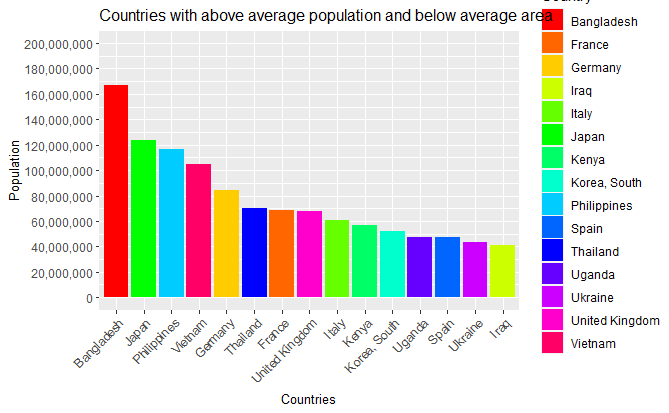